## ¿Ha sido resistiré la canción más escuchada en el confinamiento en España?


## Preparación

In [1]:
# Help: https://github.com/kelvingakuo/fycharts#in
#! pip install fycharts

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date

#Fechas selección
fecha_fin = '2020-04-29' 
fecha_inicial = '2020-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2 = datetime.strptime(fecha_fin, '%Y-%m-%d')
fecha_inicial2 = datetime.strptime(fecha_inicial, '%Y-%m-%d')
print('Días totales seleccionados:', fecha_fin2 - fecha_inicial2)

'''
# Para traer los datos iniciales de ESPAÑA
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts.db", echo=False)
api.top200Daily(output_file = "top_200_daily.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_fin, region = ["es"])
'''

Días totales seleccionados: 46 days, 0:00:00


'\n# Para traer los datos iniciales de ESPAÑA\nfrom fycharts.SpotifyCharts import SpotifyCharts\nimport sqlalchemy\n\napi = SpotifyCharts()\nconnector = sqlalchemy.create_engine("sqlite:///spotifycharts.db", echo=False)\napi.top200Daily(output_file = "top_200_daily.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", \n                start = fecha_inicial, end = fecha_fin, region = ["es"])\n'

## Importar la tabla

In [2]:
# Importamos la tabla 
data_spain = pd.read_csv("top_200_daily.csv", parse_dates= ["date"], usecols=['Position', 'date', 'Track Name', 'Artist', 'Streams'])
data_spain.set_index("date", inplace = True)
# data_spain = data_spain.loc['2020-03-21':'2020-04-14'] #Para coger un rango concreto

# Número de veces que sale la canción Resistiré de Duo dinámico en el top200
print(data_spain[data_spain ['Artist'] == 'Duo Dinamico'].shape)

# Número de veces que sale la canción Resistiré de 2020 en el top200
print(data_spain[data_spain ['Artist'] == 'Resistiré 2020'].shape)

# Hacemos algunas canciones a examinar
data_duo = data_spain [data_spain ['Artist'] == 'Duo Dinamico']
data_safaera = data_spain [data_spain['Track Name'] == 'Safaera']
data_tusa = data_spain [data_spain ['Track Name'] == 'Tusa']
data_shakira = data_spain [data_spain ['Track Name'] == 'Me Gusta']
data_aitana = data_spain [data_spain ['Track Name'] == '+']
data_panas = data_spain [data_spain ['Track Name'] == 'Como Panas']
data_resistire2020 = data_spain [data_spain ['Artist'] == 'Resistiré 2020']
data_aves = data_spain [data_spain ['Track Name'] == 'Aves Enjauladas']
data_canto = data_spain [data_spain ['Track Name'] == 'Un canto a la vida']

#Funciones, pero ojo con las canciones de Resistiré se llaman igual y no vale.
def select_position(track_name):
    data = data_spain [data_spain ['Track Name'] == track_name]
    data = data['Position'].copy()
    return data

def select_streams(track_name):
    data = data_spain [data_spain ['Track Name'] == track_name]
    data = data['Streams'].copy()
    return data

(29, 4)
(25, 4)


## Primera exploración

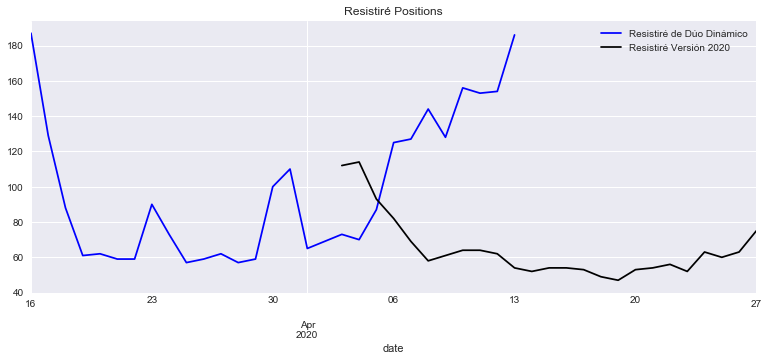

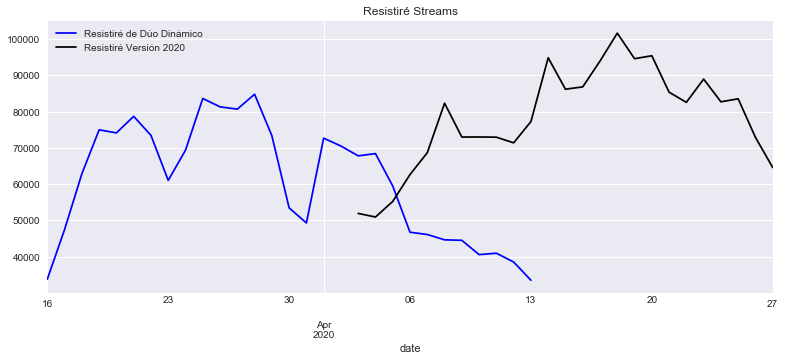

In [3]:
#Vamos a plotear como cambiar de posición la canción
plt.style.use("seaborn")
plt.subplots(figsize = (13,5))
data_duo.Position.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Positions', color= 'b')
data_resistire2020.Position.plot(label = "Resistiré Versión 2020", color= 'k')
plt.legend()
plt.show()

#Vamos a plotear el número de streams
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = 'Resistiré Versión 2020', color= 'k')
plt.legend()
plt.show()


#Preparar tablar para Datawrapper
data_duo_export_position = data_duo['Position'].copy()
data_resistire2020_export_position = data_resistire2020['Position'].copy()
data_duo_concat_positions = pd.concat([data_duo_export_position, data_resistire2020_export_position], axis=1,)
data_duo_concat_positions.columns = ['Resistiré de Dúo Dinámico', 'Resistiré Versión 2020']

data_duo_export_streams = data_duo['Streams'].copy()
data_resistire2020_export_streams = data_resistire2020['Streams'].copy()
data_duo_concat_streams = pd.concat([data_duo_export_streams, data_resistire2020_export_streams], axis=1,)
data_duo_concat_streams.columns = ['Resistiré de Dúo Dinámico', 'Resistiré Versión 2020']


# Exportar CSV
data_duo_concat_positions.to_csv('data_spotify_duo_positions.csv', sep = ';')
data_duo_concat_streams.to_csv('data_spotify_duo_streams.csv', sep = ';')

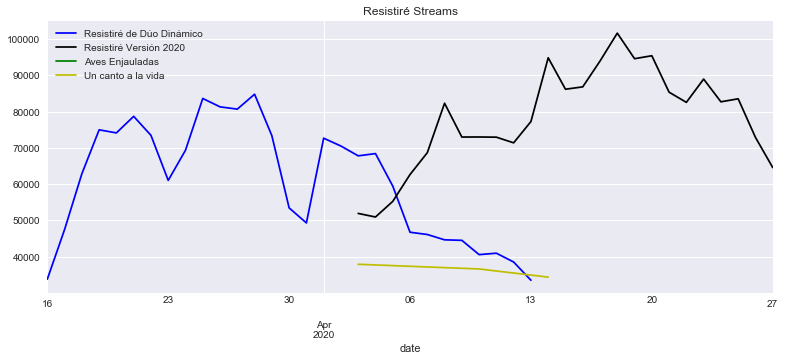

In [4]:
#Vamos a plotear las cancaiones de resistiré y otras posibles similares
plt.style.use("seaborn")
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = "Resistiré Versión 2020", color= 'k')
data_aves.Streams.plot(label = 'Aves Enjauladas', color= 'g')
data_canto.Streams.plot(label = 'Un canto a la vida', color= 'y')
plt.legend()
plt.show()

#Preparar tablar para Datawrapper
data_variasesp_concat_streams = pd.concat([data_duo_export_streams,data_resistire2020_export_streams, select_streams('Aves Enjauladas'), select_streams('Un canto a la vida')], axis=1,)
data_variasesp_concat_streams.columns = ['Resistiré, de Dúo Dinámico', 'Resistiré Versión 2020', 'Aves Enjauladas, de Rozalén', 'Un canto a la vida, de Vanesa M. y David S.']

# Exportar CSV
data_variasesp_concat_streams.to_csv('data_spotify_variasesp_streams.csv', sep = ';')

In [5]:
# Para encontrar determindas palabras en lista
def check(word, list):
    if word in list:
        print("The word is in the list!")
    else:
        print("The word is not in the list!")

artist_list = pd.unique(data_spain['Artist']).tolist()
track_list = pd.unique(data_spain['Track Name']).tolist()
check('Un canto a la vida', track_list)

The word is in the list!


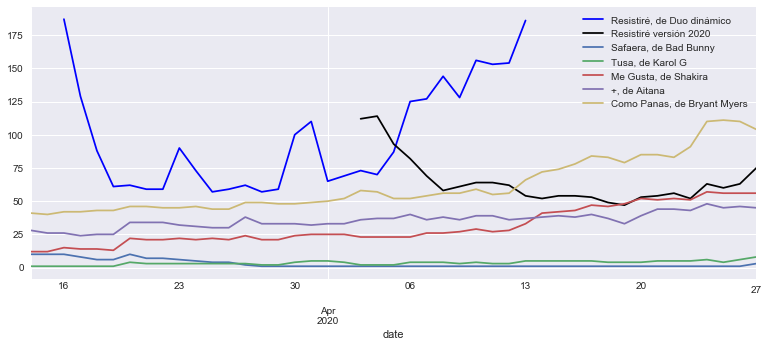

In [9]:
#Vamos a plotear la posición de varias elegidas
plt.subplots(figsize = (13,5))

data_duo.Position.plot(label = "Resistiré, de Duo dinámico", color= 'b')
data_resistire2020.Position.plot(label = "Resistiré versión 2020", color= 'k')
data_safaera.Position.plot(label = "Safaera, de Bad Bunny")
data_tusa.Position.plot(label = "Tusa, de Karol G")
data_shakira.Position.plot(label = "Me Gusta, de Shakira")
data_aitana.Position.plot(label = "+, de Aitana")
data_panas.Position.plot(label = "Como Panas, de Bryant Myers")
plt.legend()
plt.show()

#Exportar para datawrapper
data_concat_varios = pd.concat([data_duo_export_position,
                                data_resistire2020_export_position,
                                select_position('Safaera'),
                                select_position('Tusa'),
                                select_position('Me Gusta'),
                                select_position('+'),
                                select_position('Como Panas')], axis=1)

data_concat_varios.columns = ['Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020',
                              'Safaera, de Bad Bunny', 
                              "Tusa, de Karol G", 
                              "Me Gusta, de Shakira",
                              "+, de Aitana",
                              "Como Panas, de Bryant Myers"]

# Exportar CSV
data_concat_varios.to_csv('data_spotify_varios_positions.csv', sep = ';')

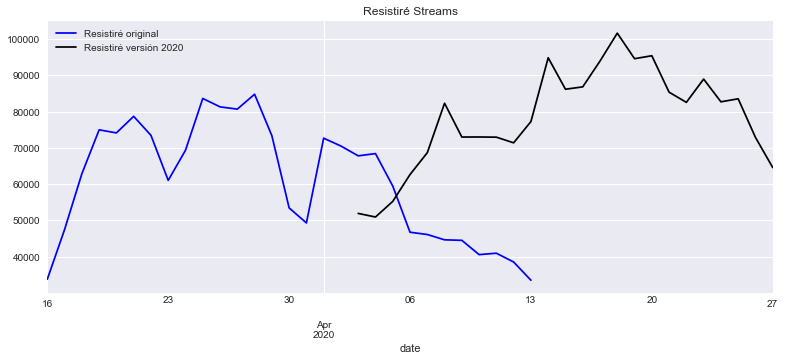

In [10]:
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = "Resistiré original", title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = "Resistiré versión 2020", color= 'k')
plt.legend()
#plt.show()

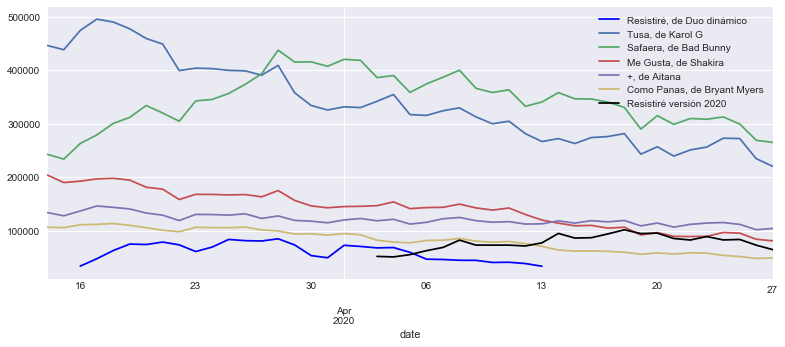

In [16]:
#Vamos a plotear los streams de varias elegidas
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = "Resistiré, de Duo dinámico", color= 'b')
data_tusa.Streams.plot(label = "Tusa, de Karol G")
data_safaera.Streams.plot(label = "Safaera, de Bad Bunny")
data_shakira.Streams.plot(label = "Me Gusta, de Shakira")
data_aitana.Streams.plot(label = "+, de Aitana")
data_panas.Streams.plot(label = "Como Panas, de Bryant Myers")
data_resistire2020.Streams.plot(label = "Resistiré versión 2020", color= 'k')
plt.legend()
plt.show()

#Exportar para datawrapper
data_concat_varios_streams = pd.concat([data_duo_export_streams,
                                data_resistire2020_export_streams,
                                select_streams('Safaera'),
                                select_streams('Tusa'),
                                select_streams('Me Gusta'),
                                select_streams('+'),
                                select_streams('Como Panas')], axis=1)
data_concat_varios_streams.columns = ['Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020',
                              'Safaera, de Bad Bunny', 
                              "Tusa, de Karol G", 
                              "Me Gusta, de Shakira",
                              "+, de Aitana",
                              "Como Panas, de Bryant Myers"]

# Exportar CSV
data_concat_varios_streams.to_csv('data_spotify_varios_streams.csv', sep = ';')

## Para ver canciones que se mueve más de 50 puestos en el periodo

In [12]:
# Para ver cuantas canciones suben de puesto desde una fecha inicial a una fecha final 
count_general = 0
count_stop = 0
count_up = 0
count_down = 0
count_out = 0
count_else =  0
dataframe = pd.DataFrame()

for i in data_spain['Track Name']:
    count_general = count_general + 1
    if count_stop == 10000:
        break
    else:
        data = data_spain [data_spain ['Track Name'] == i]
        try:
            if (data.Position['2020-03-15'] - data.Position['2020-04-10'] > 50) == True:            
                # data.Position.plot(label = i, title=i, color= 'b')
                # plt.show()
                # print('Sube!:', i)
                dataframe = pd.concat([dataframe, data], axis=0,)
                count_up = count_up + 1
            elif (data.Position['2020-03-15'] - data.Position['2020-04-10'] <= 50) == True:
                count_down = count_down + 1
                # data.Position.plot(label = i, title=i, color= 'b')
                # plt.show()
                # print('Sube!:', i)
                
            else:
                # print('No sube en puestos:', i)
                count_else = count_else  + 1
                continue       
        except KeyError:
            count_out = count_out + 1
            # print('Una que sale de la lista:', i)
            continue       
    count_stop = count_stop + 1

print('Canciones que se analizan:', count_general)
print('Canciones que se suben de puesto:', count_up)
print('Canciones que bajan de puesto:', count_down)
print('Caque ni suben ni bajan puestos:', count_else)
print('Canciones que salen de la lista:', count_out)
print('¿Coinciden total con analizadas?:', count_general == count_up + count_down + count_out)


# Para ver cuántos valores únicos hay
print(dataframe['Track Name'].nunique())

# Mostrar qué valores únicos hay 
pd.unique(dataframe['Track Name']).tolist()

Canciones que se analizan: 9000
Canciones que se suben de puesto: 268
Canciones que bajan de puesto: 6172
Caque ni suben ni bajan puestos: 0
Canciones que salen de la lista: 2560
¿Coinciden total con analizadas?: True
6


['Mil Tequilas',
 'Atrévete',
 'Physical',
 'PORFA',
 'Roses - Imanbek Remix',
 'death bed (coffee for your head) (feat. beabadoobee)']

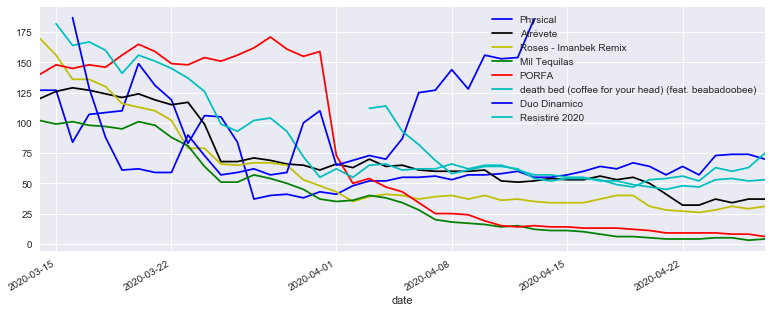

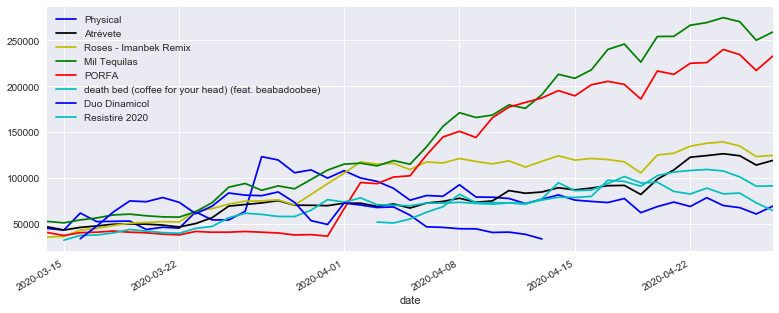

In [13]:
# Vamos a plotearlo
plt.subplots(figsize = (13,5))
data_spain[data_spain['Track Name'] =='Physical'].Position.plot(label = "Physical", color= 'b')
data_spain[data_spain['Track Name'] =='Atrévete'].Position.plot(label = "Atrévete", color= 'k')
data_spain[data_spain['Track Name'] =='Roses - Imanbek Remix'].Position.plot(label = "Roses - Imanbek Remix", color= 'y')
data_spain[data_spain['Track Name'] =='Mil Tequilas'].Position.plot(label = 'Mil Tequilas', color= 'g')
data_spain[data_spain['Track Name'] =='PORFA'].Position.plot(label = "PORFA", color= 'r')
data_spain[data_spain['Track Name'] =='death bed (coffee for your head) (feat. beabadoobee)'].Position.plot(label = "death bed (coffee for your head) (feat. beabadoobee)", color= 'c')
data_spain[data_spain['Artist'] =='Duo Dinamico'].Position.plot(label = "Duo Dinamico", color= 'b')
data_spain[data_spain['Artist'] =='Resistiré 2020'].Position.plot(label = "Resistiré 2020", color= 'c')
plt.legend()
plt.show()

# Vamos a plotearlo
plt.subplots(figsize = (13,5))
data_spain[data_spain['Track Name'] =='Physical'].Streams.plot(label = "Physical", color= 'b')
data_spain[data_spain['Track Name'] =='Atrévete'].Streams.plot(label = "Atrévete", color= 'k')
data_spain[data_spain['Track Name'] =='Roses - Imanbek Remix'].Streams.plot(label = "Roses - Imanbek Remix", color= 'y')
data_spain[data_spain['Track Name'] =='Mil Tequilas'].Streams.plot(label = 'Mil Tequilas', color= 'g')
data_spain[data_spain['Track Name'] =='PORFA'].Streams.plot(label = "PORFA", color= 'r')
data_spain[data_spain['Track Name'] =='death bed (coffee for your head) (feat. beabadoobee)'].Streams.plot(label = "death bed (coffee for your head) (feat. beabadoobee)", color= 'c')
data_spain[data_spain['Artist'] =='Duo Dinamico'].Streams.plot(label = "Duo Dinamicol", color= 'b')
data_spain[data_spain['Artist'] =='Resistiré 2020'].Streams.plot(label = "Resistiré 2020", color= 'c')
plt.legend()
plt.show()


data_concat_up_streams = pd.concat([select_streams('Physical'),
                                select_streams('Atrévete'),
                                select_streams('Roses - Imanbek Remix'),
                                select_streams('Mil Tequilas'),
                                select_streams('PORFA'),
                                select_streams('death bed (coffee for your head) (feat. beabadoobee)'),
                                data_duo_export_streams,
                                data_resistire2020_export_streams], axis=1)

data_concat_up_streams.columns = ['Physical, de Dua Lipa', 
                              'Atrévete, de Yago Roche', 
                              "Roses - Imanbek Remix, de SAINt JHN", 
                              "Mil tequilas, de Chema Rivas",
                              "PORFA, de Feid",
                              "Death bed (coffee for your head)",
                              'Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020']

# Preparar tablar para Datawrapper POSITIONS
data_concat_up_position = pd.concat([select_position('Physical'),
                                select_position('Atrévete'),
                                select_position('Roses - Imanbek Remix'),
                                select_position('Mil Tequilas'),
                                select_position('PORFA'),
                                select_position('death bed (coffee for your head) (feat. beabadoobee)'),
                                data_duo_export_position,
                                data_resistire2020_export_position], axis=1)

data_concat_up_position.columns = ['Physical, de Dua Lipa', 
                              'Atrévete, de Yago Roche', 
                              "Roses - Imanbek Remix, de SAINt JHN", 
                              "Mil tequilas, de Chema Rivas",
                              "PORFA, de Feid",
                              "death bed (coffee for your head)",
                              'Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020']

# Exportar CSV
data_concat_up_streams.to_csv('data_spotify_up_streams.csv', sep = ';')
data_concat_up_position.to_csv('data_spotify_up_position.csv', sep = ';')

In [14]:
# Para terminar, vamos a ver cómo cambia el top10 durante el confinamiento
# data_spain[data_spain['Position'] == 10]
# data_spain[data_spain['Track Name'] ==  'Medusa'].head()

list_top10 = ['Tusa','Amarillo','Safaera', 'Rojo', 'La Difícil', 'Yo Perreo Sola', 'Dime Bbsita','Morado','Diosa', 'Mil Tequilas', 'Azul', '4 besos', 'Tattoo', 'Ignorantes', 'Sola & Vacía', 'Gris', 'Keii', 'Rosa', 'Una Mala (Remix)', 'Medusa']

def select_position(track_name):
    data = data_spain [data_spain ['Track Name'] == track_name]
    data = data['Position'].copy()
    return data

data_concat_top10_position = pd.concat([select_position('Tusa'),
                                select_position('Amarillo'),
                                select_position('Safaera'),
                                select_position('Rojo'),
                                select_position('La Difícil'),
                                select_position('Yo Perreo Sola'),
                                select_position('Dime Bbsita'),
                                select_position('Morado'),
                                select_position('Diosa'),
                                select_position('Mil Tequilas'),
                                select_position('Azul'),
                                select_position('4 besos'),
                                select_position('Tattoo'),
                                select_position('Ignorantes'),
                                select_position('Sola & Vacía'),
                                select_position('Gris'),
                                select_position('Keii'),
                                select_position('Rosa'),
                                select_position('Una Mala (Remix)'),
                                select_position('Medusa')], axis=1)

data_concat_top10_position.columns = ['Tusa, de KAROL G',
                              'Amarillo, de J Balvin',
                              'Safaera, de Bad Bunny',
                              'Rojo, de J Balvin',
                              'La Difícil, de Bad Bunny',
                              'Yo Perreo Sola, de Bad Bunny',
                              'Dime Bbsita, de Robledo',
                              'Morado, de J Balvin',
                              'Diosa, de Myke Towers',
                              'Mil Tequilas, de Chema Rivas',
                              'Azul, de J Balvin',
                              '4 besos,de Lola Indigo',
                              'Tattoo, de Rauw Alejandro',
                              'Ignorantes, de Bad Bunny',
                              'Sola & Vacía, de Casper Magico',
                              'Gris, de J Balvin',
                              'Keii, Anuel AA',
                              'Rosa, de J Balvin',
                              'Una Mala (Remix), de El Completo Rd',
                              'Medusa, de Jhay Cortez']
#Exportar:
data_concat_top10_position.to_csv('data_spotify_top10_position.csv', sep = ';')
data_concat_top10_position.head()

,"Tusa, de KAROL G","Amarillo, de J Balvin","Safaera, de Bad Bunny","Rojo, de J Balvin","La Difícil, de Bad Bunny","Yo Perreo Sola, de Bad Bunny","Dime Bbsita, de Robledo","Morado, de J Balvin","Diosa, de Myke Towers","Mil Tequilas, de Chema Rivas","Azul, de J Balvin","4 besos,de Lola Indigo","Tattoo, de Rauw Alejandro","Ignorantes, de Bad Bunny","Sola & Vacía, de Casper Magico","Gris, de J Balvin","Keii, Anuel AA","Rosa, de J Balvin","Una Mala (Remix), de El Completo Rd","Medusa, de Jhay Cortez"
date,,,,,,,,,,,,,,,,,,,,
2020-03-14,1,NaN,10,5,2,34,NaN,8,4,102,NaN,NaN,3,6,NaN,NaN,7,NaN,38,9
2020-03-15,1,NaN,10,5,2,33,NaN,8,4,99,NaN,NaN,3,6,NaN,NaN,7,NaN,39,9
2020-03-16,1,NaN,10,5,2,33,NaN,7,4,101,NaN,NaN,3,6,NaN,NaN,8,NaN,28,9
2020-03-17,1,NaN,8,4,2,34,NaN,6,5,98,NaN,NaN,3,7,NaN,NaN,10,NaN,21,9
2020-03-18,1,NaN,6,4,2,33,NaN,7,5,97,NaN,NaN,3,8,NaN,NaN,9,NaN,21,10


## ¿Y en Francia?

In [28]:
'''# Probando con Francia y La Trendresse
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts.db", echo=False)
api.top200Daily(output_file = "top_200_daily_france.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", start = '2020-03-01', end = '2020-04-18', region = ["fr"])

# Importar datos
data_france = pd.read_csv("top_200_daily_france.csv", parse_dates= ["date"], usecols=['Position', 'date', 'Track Name', 'Artist', 'Streams'])
data_france.set_index("date", inplace = True)
# data_spain = data_spain.loc['2020-03-21':'2020-04-14'] PAra conger un rango concreto
data_france.head(15)
print(data_france[data_france ['Track Name'] == 'La tendresse'].shape)
data_france['Track Name'].str.count('Blinding Lights').sum()
'''

INFO : 18/04/2020 09:59:34 AM : Extracting top 200 daily for 2020-03-01 - fr
INFO : 18/04/2020 09:59:35 AM : Extracting top 200 daily for 2020-03-02 - fr
INFO : 18/04/2020 09:59:35 AM : POSTing data to the endpoint h
INFO : 18/04/2020 09:59:35 AM : Appending data to the table top_200_daily
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/SpotifyCharts.py", line 87, in __post_to_endpoint_from_queue
    postToRestEndpoint(df, url, what_data)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/write_to_outputs.py", line 54, in postToRestEndpoint
    raise(e)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/write_to_outputs.py", line 51, in postToRestEndpoint
    requests.post(url, json = dump)
  File "/Users/victormac/anaconda3/lib/python3.7/site-packages/requests/api.py", line 119, in post
    return request('post', url, data=data,

KeyboardInterrupt: 

## Exportar datos a FTP

In [17]:
# Ayuda: https://www.pythoncircle.com/post/668/uploading-a-file-to-ftp-server-using-python/
import csv
from ftplib import FTP
from io import StringIO

passw = pd.read_csv("pass.txt", sep = ',', encoding="utf-8")
host = "akakicreations.com"
username = passw.columns[0]
password = passw.columns[1]
ftp = FTP(host=host)
login_status = ftp.login(user=username, passwd=password)
print(login_status)



print(ftp.dir())

fp = open("data_spotify_duo_positions.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_duo_positions.csv"), fp, 1024)

fp = open("data_spotify_duo_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_duo_streams.csv"), fp, 1024)

fp = open("data_spotify_varios_positions.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_varios_positions.csv"), fp, 1024)

fp = open("data_spotify_varios_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_varios_streams.csv"), fp, 1024)

fp = open("data_spotify_variasesp_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_variasesp_streams.csv"), fp, 1024)

fp = open("data_spotify_up_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_up_streams.csv"), fp, 1024)

fp = open("data_spotify_up_position.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_up_position.csv"), fp, 1024)

fp = open("data_spotify_top10_position.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_top10_position.csv"), fp, 1024)


fp.close()


230-OK. Current restricted directory is /
230 406 Kbytes used (0%) - authorized: 51200 Kb
drwxr-xr-x    2 akakicre   akakicre         4096 Apr 22 13:53 .
drwxr-xr-x    2 akakicre   akakicre         4096 Apr 22 13:53 ..
-rw-------    1 akakicre   akakicre           10 Apr 29 08:36 .ftpquota
-rw-r--r--    1 akakicre   akakicre       260069 Apr  3 13:34 Imagen_github.jpg
-rw-r--r--    1 akakicre   akakicre          519 Apr 28 15:55 data_ccaa_confirmed_recovered_deaths.csv
-rw-r--r--    1 akakicre   akakicre         5855 Apr 28 15:55 data_ccaa_evolution_confirmed.csv
-rw-r--r--    1 akakicre   akakicre         3603 Apr 28 15:55 data_ccaa_evolution_deaths.csv
-rw-r--r--    1 akakicre   akakicre         3064 Apr 28 15:55 data_ccaa_evolution_recovered.csv
-rw-r--r--    1 akakicre   akakicre          547 Apr 28 15:55 data_ccaa_newcases_confirmed_recovered_deaths.csv
-rw-r--r--    1 akakicre   akakicre         1185 Apr 28 15:55 data_somecountries_newcases.csv
-rw-r--r--    1 akakicre   akakicre